# Data Exploration & Cleaning

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

In [5]:
df_data.shape

(962, 16)

In [6]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [7]:
df_data['year'].min()

1901

In [8]:
df_data['year'].max()

2020

### Check for Duplicates

In [9]:
df_data.duplicated().values.sum()

0

### Check for NaN Values

In [10]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [11]:
col_subset = ['birth_date', 'birth_city', 'organization_name', 'full_name']

In [12]:
df_data.loc[df_data.birth_date.isna()][col_subset]

,birth_date,birth_city,organization_name,full_name
24,NaN,NaN,NaN,Institut de droit international (Institute of ...
60,NaN,NaN,NaN,Bureau international permanent de la Paix (Per...
89,NaN,NaN,NaN,Comité international de la Croix Rouge (Intern...
200,NaN,NaN,NaN,Office international Nansen pour les Réfugiés ...
215,NaN,NaN,NaN,Comité international de la Croix Rouge (Intern...
237,NaN,NaN,NaN,American Friends Service Committee (The Quakers)
238,NaN,NaN,NaN,Friends Service Council (The Quakers)
283,NaN,NaN,NaN,Office of the United Nations High Commissioner...
348,NaN,NaN,NaN,Comité international de la Croix Rouge (Intern...
349,NaN,NaN,NaN,Ligue des Sociétés de la Croix-Rouge (League o...


#### Convert Year and Birth Date to Datetime

In [13]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

In [14]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


#### Add a Column with the Prize Share as a Percentage

In [15]:
sep_values = df_data.prize_share.str.split('/', expand=True)

In [16]:
numerator = pd.to_numeric(sep_values[0])
denominator = pd.to_numeric(sep_values[1])
df_data['share_pct'] = numerator / denominator

In [17]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

In [18]:
sex = df_data.sex.value_counts()
fig = px.pie(values=sex.values,
             names=sex.index,
             title='Percentage of Male vs. Female Laureates',
             hole=0.6)

fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

In [19]:
df_data[df_data.sex == 'Female'].head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Find the Repeat Winners

In [20]:
df_data[df_data.full_name.duplicated(keep=False)]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,1.00
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
297,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.33
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR,1.00
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50


# Number of Prizes per Category

In [21]:
df_data.category.nunique()

6

In [22]:
prizes_per_cat = df_data.category.value_counts()

In [23]:
bar = px.bar(x=prizes_per_cat.index,
             y=prizes_per_cat.values,
             color=prizes_per_cat.values,
             color_continuous_scale='Aggrnyl',
             title='Number of Prizes Awarded per Category')

bar.update_layout(xaxis_title='Nobel Prize Category',
                  coloraxis_showscale=False,
                  yaxis_title='Number of Prizes')

bar.show()

#### When was the first prize in the field of Economics awarded?

In [24]:
df_data[df_data.category == 'Economics'].head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50


# Male and Female Winners by Category

In [25]:
men_and_women_cat = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})

In [26]:
men_and_women_cat.head()

,category,sex,prize
0,Chemistry,Female,7
1,Chemistry,Male,179
2,Economics,Female,2
3,Economics,Male,84
4,Literature,Female,16


In [27]:
stacked_bar = px.bar(x=men_and_women_cat.category,
                     y=men_and_women_cat.prize,
                     color=men_and_women_cat.sex,
                     title='Number of Prizes Awarded by Category split by Sex')

stacked_bar.update_layout(xaxis_title='Category',
                          yaxis_title='Number of Prizes')

stacked_bar.show()

# Number of Prizes Awarded Over Time

In [28]:
prizes_per_year = df_data.groupby(['year']).count().prize

In [29]:
prizes_per_year.head()

year
1901    6
1902    7
1903    7
1904    6
1905    5
Name: prize, dtype: int64

In [30]:
moving_avg = prizes_per_year.rolling(window=5).mean()

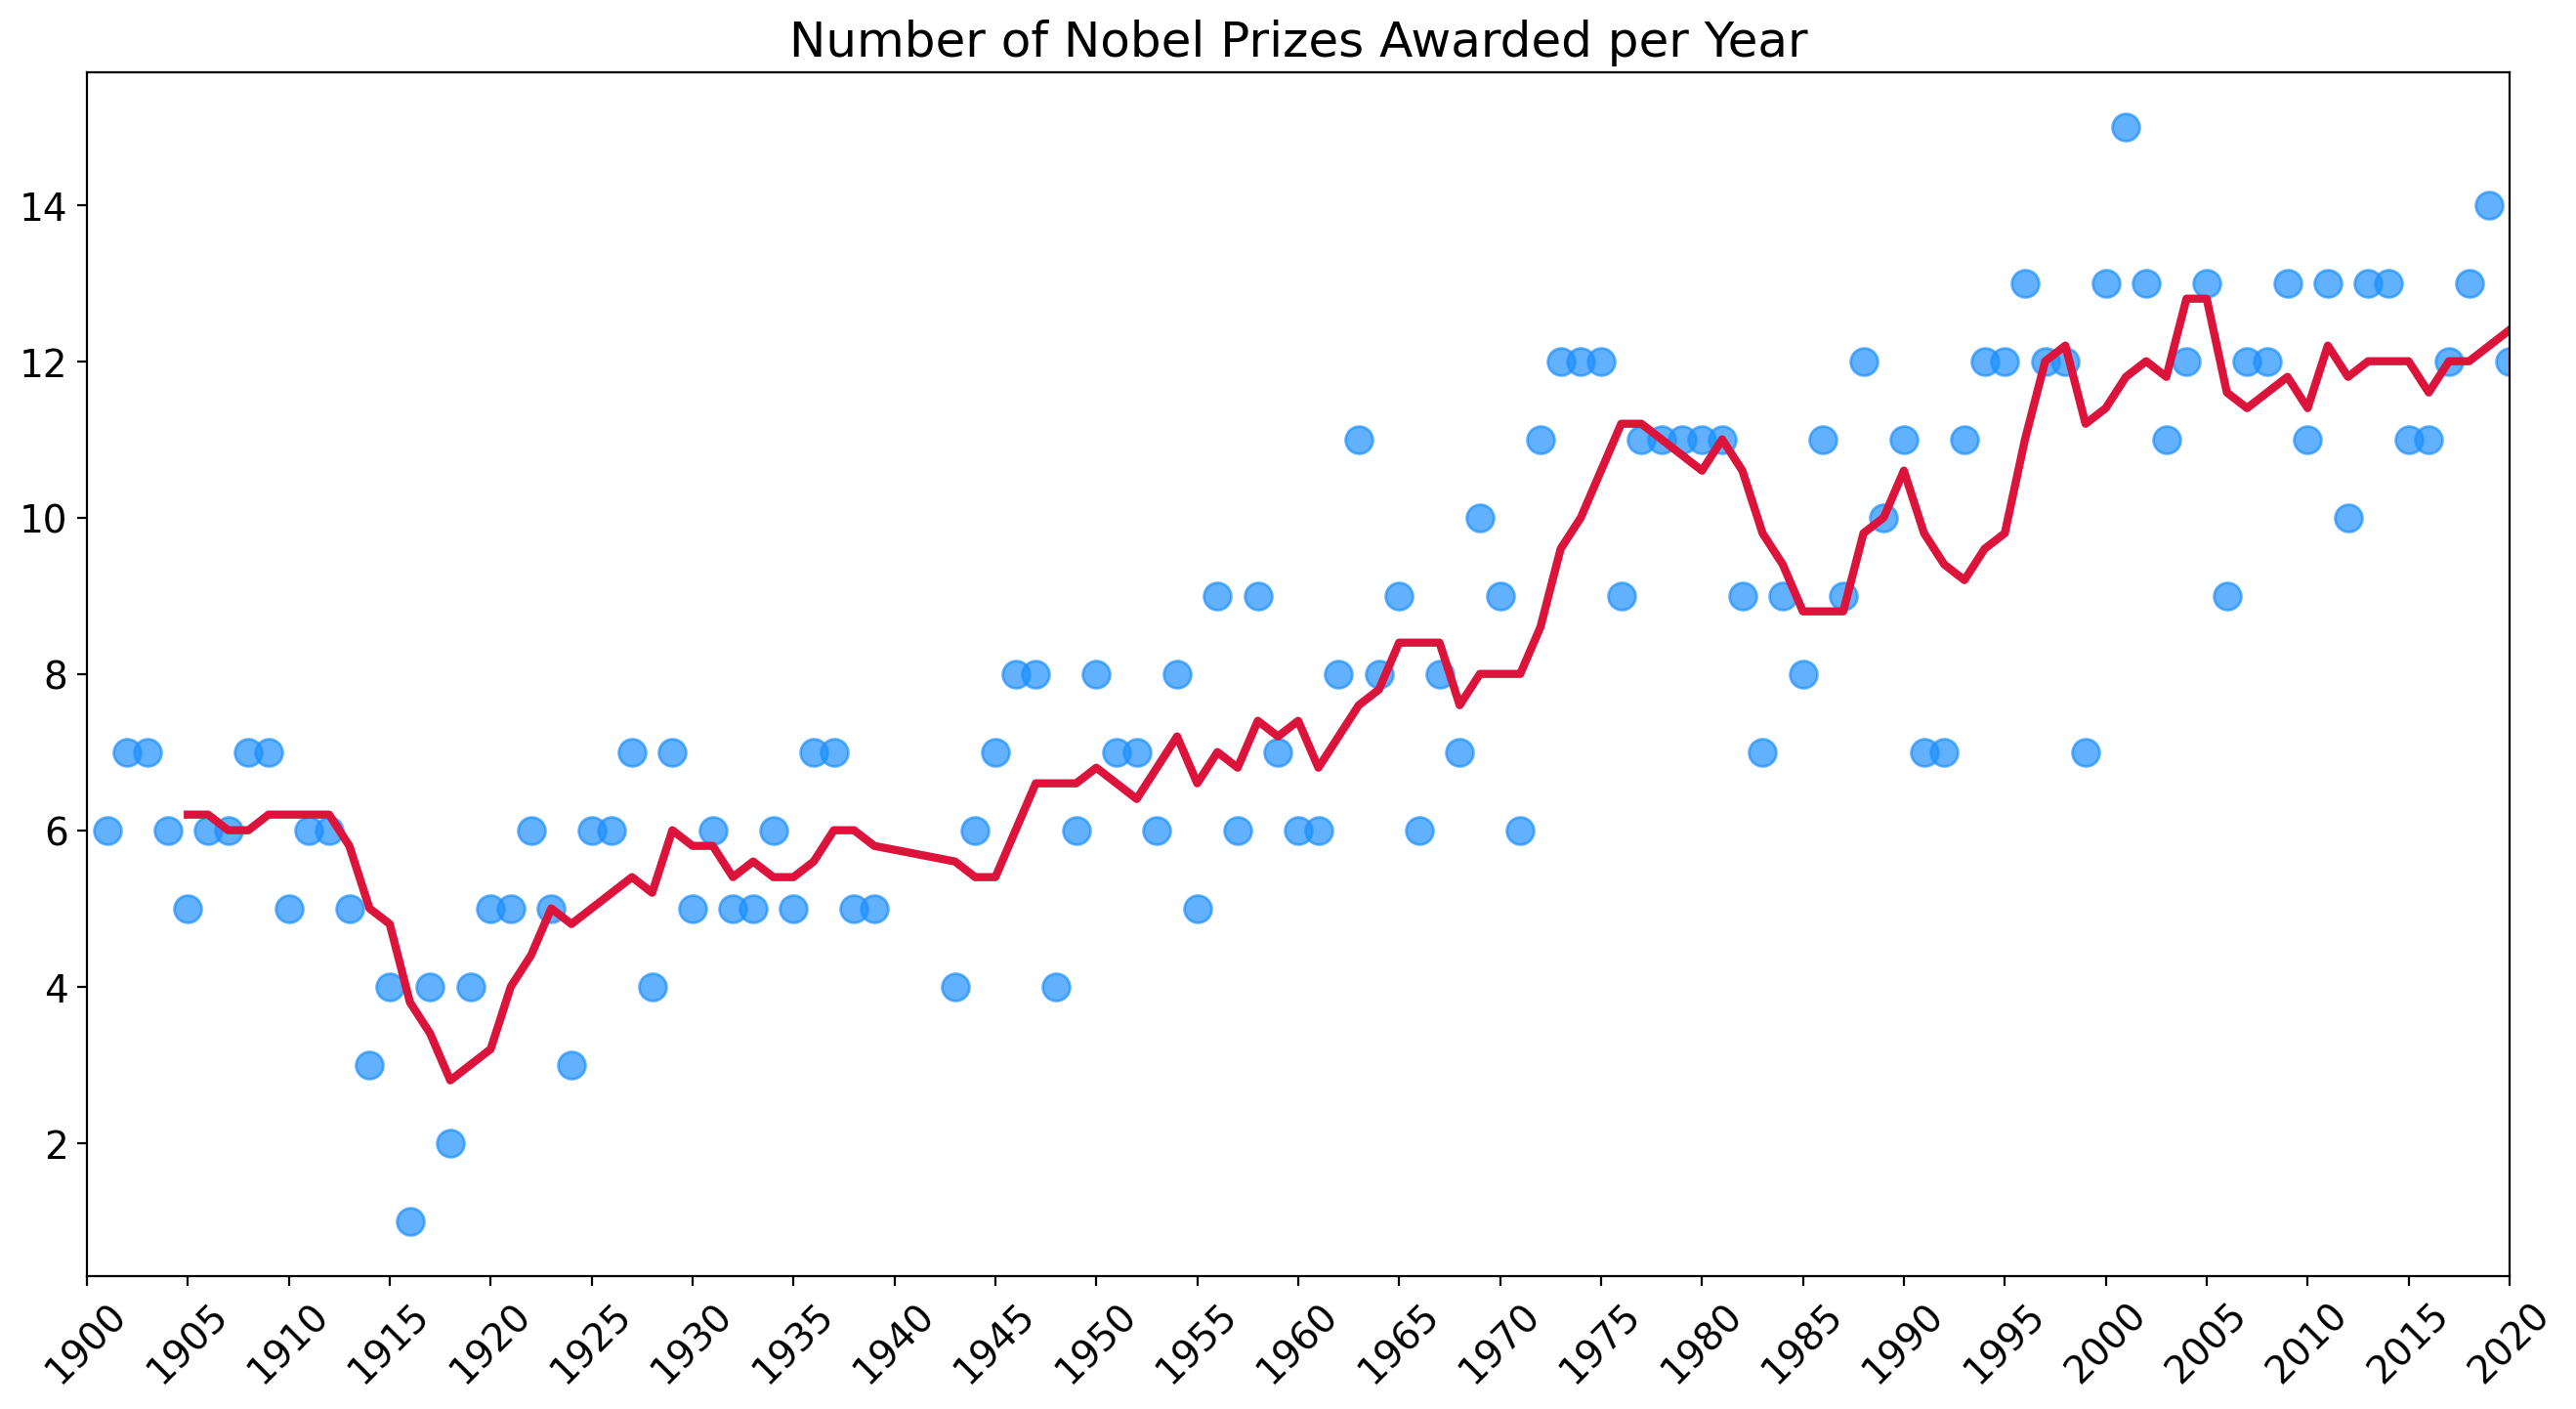

In [31]:
xticks = np.arange(1900, 2021, step=5)

plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=xticks,
           fontsize=14,
           rotation=45)

ax = plt.gca()
ax.set_xlim(1900, 2020)

ax.scatter(x=prizes_per_year.index,
            y=prizes_per_year.values,
            c='dodgerblue',
            alpha=0.7,
            s=100)

ax.plot(prizes_per_year.index,
         moving_avg.values,
         c='crimson',
         linewidth=3)

plt.show()

#### Are more prizes being shared than before?

In [32]:
avg_prize_share = df_data.groupby(['year']).mean().share_pct

In [33]:
moving_avg2 = avg_prize_share.rolling(window=5).mean()

In [34]:
moving_avg2

year
1901    NaN
1902    NaN
1903    NaN
1904    NaN
1905   0.82
       ... 
2016   0.52
2017   0.50
2018   0.50
2019   0.50
2020   0.49
Name: share_pct, Length: 117, dtype: float64

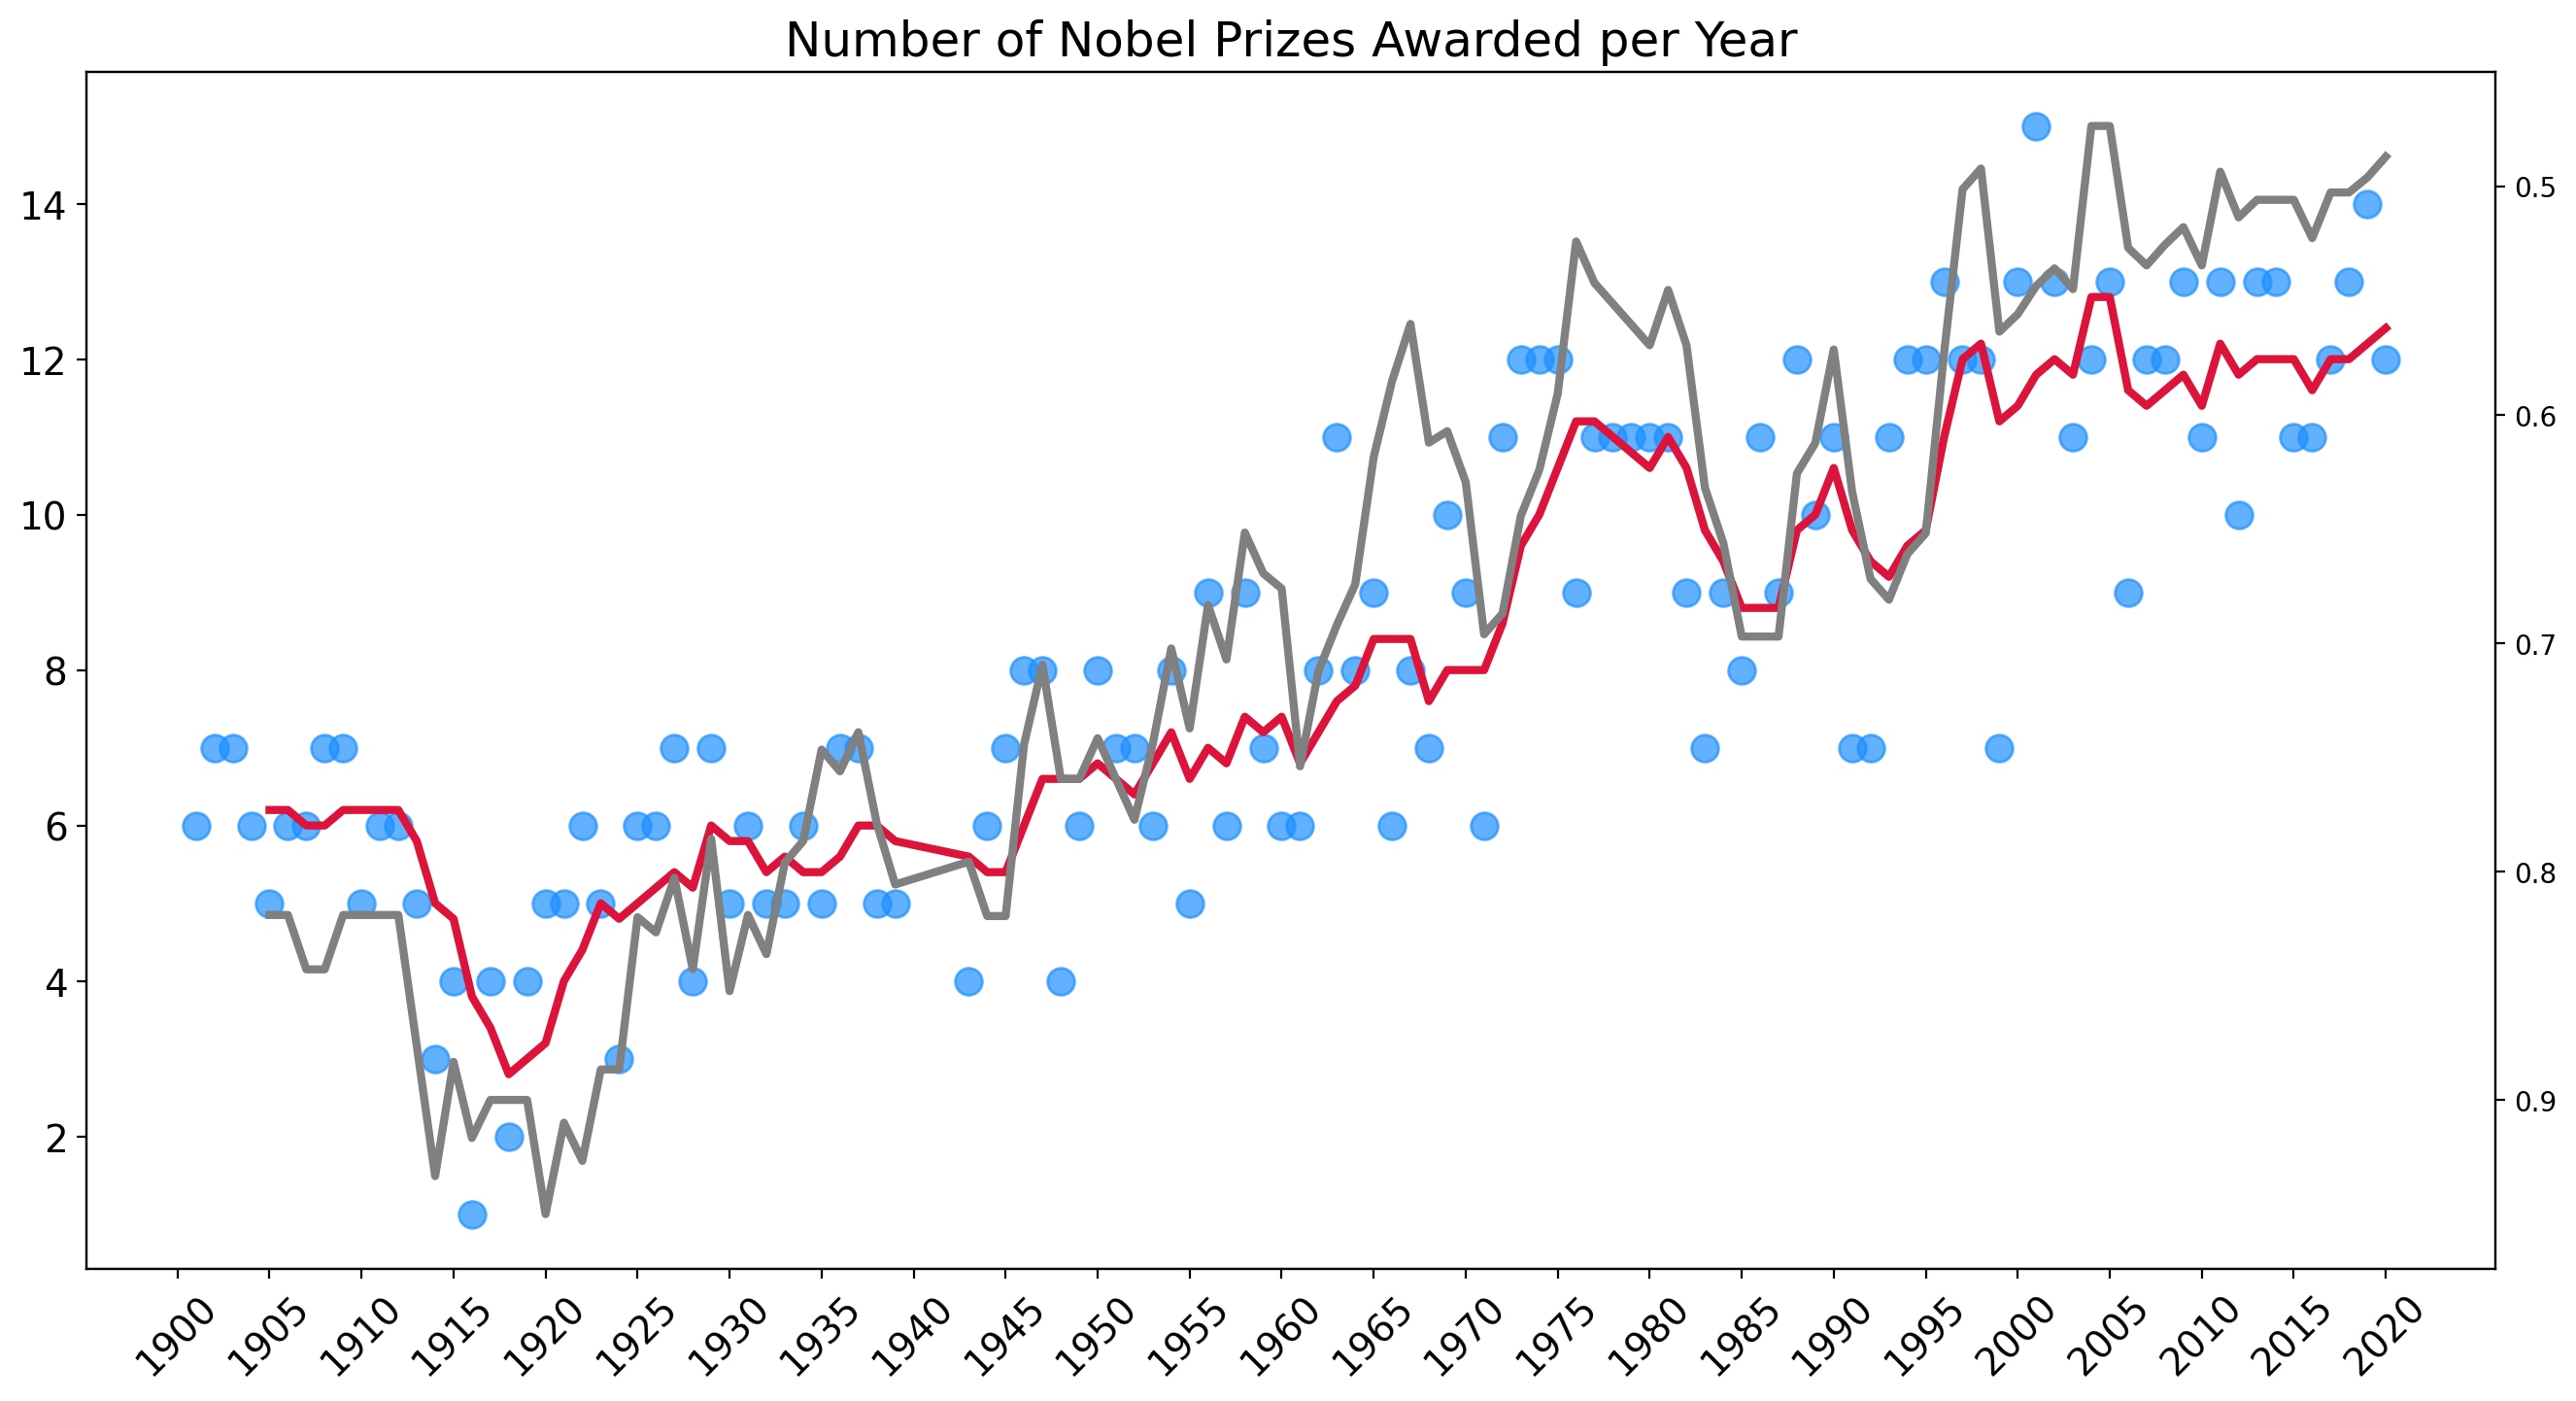

In [35]:
xticks = np.arange(1900, 2021, step=5)

plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=xticks,
           fontsize=14,
           rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax.set_xlim(1900, 2020)
ax2.invert_yaxis()

ax1.scatter(x=prizes_per_year.index,
            y=prizes_per_year.values,
            c='dodgerblue',
            alpha=0.7,
            s=100)

ax1.plot(prizes_per_year.index,
         moving_avg.values,
         c='crimson',
         linewidth=3)

ax2.plot(avg_prize_share.index,
         moving_avg2.values,
         c='grey',
         linewidth=3)

plt.show()

# The Countries with the Most Nobel Prizes

In [36]:
top20_countries = df_data.groupby(['birth_country_current'], as_index=False).agg({'prize':pd.Series.count})

In [37]:
top20_countries.head(25)

,birth_country_current,prize
0,Algeria,2
1,Argentina,4
2,Australia,10
3,Austria,18
4,Azerbaijan,1
5,Bangladesh,1
6,Belarus,4
7,Belgium,9
8,Bosnia and Herzegovina,2
9,Brazil,1


In [38]:
top20_countries.sort_values('prize', inplace=True)

In [39]:
top20_countries = top20_countries[-20:]

In [40]:
h_bar = px.bar(x=top20_countries.prize,
               y=top20_countries.birth_country_current,
               orientation='h',
               color=top20_countries.prize,
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes')

h_bar.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='Country',
                    coloraxis_showscale=False,
                    font=dict(size=8))

h_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country


In [41]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count})

df_countries.sort_values('prize', ascending=False)

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
32,Iceland,ISL,1
47,Madagascar,MDG,1
34,Indonesia,IDN,1
36,Iraq,IRQ,1


In [42]:
map = px.choropleth(df_countries,
                    locations='ISO',
                    color='prize',
                    hover_name='birth_country_current',
                    color_continuous_scale='matter')

map.show()

# In Which Categories are the Different Countries Winning Prizes?

In [43]:
df_country_category = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})

In [44]:
df_country_category.sort_values('prize', ascending=False, inplace=True)

In [45]:
df_country_category.head()

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28


In [46]:
df_merged = pd.merge(df_country_category, top20_countries, on='birth_country_current')
df_merged.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']

df_merged.sort_values('total_prize', inplace=True)

In [47]:
h_bar2 = px.bar(x=df_merged.cat_prize,
                y=df_merged.birth_country_current,
                orientation='h',
                color=df_merged.category,
                title='Top 20 Countries by Number of Prizes and Category')

h_bar2.update_layout(xaxis_title='Country',
                     yaxis_title='Number of Prizes')

h_bar2.show()

### Number of Prizes Won by Each Country Over Time

In [48]:
country_year = df_data.groupby(['birth_country_current', 'year'], as_index=False).count()
country_year = country_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

In [49]:
cumulative_prizes = country_year.groupby(['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()

cumulative_prizes.reset_index(inplace=True)

In [50]:
cumulative_prizes.head()

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3


In [51]:
line = px.line(cumulative_prizes,
               x='year',
               y='prize',
               color='birth_country_current',
               hover_name='birth_country_current')

line.update_layout(xaxis_title='Year',
                   yaxis_title='Number of Prizes')

line.show()

# What are the Top Research Organizations?

In [52]:
institution_prize = df_data.groupby(['organization_name'], as_index=False).agg({'prize': pd.Series.count})

In [53]:
institution_prize.sort_values('prize', inplace=True)

In [54]:
institution_prize.tail()

,organization_name,prize
198,University of Chicago,20
117,Massachusetts Institute of Technology (MIT),21
167,Stanford University,23
68,Harvard University,29
196,University of California,40


In [55]:
institution_prize = institution_prize[-20:]

In [56]:
h_bar3 = px.bar(institution_prize,
                x='prize',
                y='organization_name',
                title='Top 20 Research Institutions by Number of Prizes',
                color='prize',
                hover_name='organization_name',
                color_continuous_scale='Viridis',
                orientation='h')

h_bar3.update_layout(xaxis_title='Number of Prizes',
                     yaxis_title='Institution',
                     coloraxis_showscale=False,
                     font=dict(size=8))

h_bar3.show()

# Which Cities Make the Most Discoveries?

In [57]:
top20_cities = df_data.organization_city.value_counts()[:20]

In [58]:
top20_cities.sort_values(ascending=True, inplace=True)

In [59]:
h_bar4 = px.bar(x=top20_cities.values,
                y=top20_cities.index,
                color=top20_cities.values,
                orientation='h',
                color_continuous_scale='matter',
                title='Top 20 Cities by Number of Prizes')

h_bar4.update_layout(xaxis_title='Number of Prizes',
                     yaxis_title='City',
                     coloraxis_showscale=False,
                     font=dict(size=8))

h_bar4.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities

In [60]:
top20_birth_cities = df_data.birth_city.value_counts()[:20]

In [61]:
top20_birth_cities.sort_values(ascending=True, inplace=True)

In [62]:
top20_birth_cities.head()

Ann Arbor, MI     3
Montreal          4
Cairo             4
Pittsburgh, PA    4
Prague            5
Name: birth_city, dtype: int64

In [63]:
h_bar5 = px.bar(x=top20_birth_cities.values,
                y=top20_birth_cities.index,
                color=top20_birth_cities.values,
                orientation='h',
                title='Where were the Nobel Laureates Born?',
                color_continuous_scale='Plasma')

h_bar5.update_layout(xaxis_title='Number of Prizes',
                     yaxis_title='City of Birth',
                     coloraxis_showscale=False,
                     font=dict(size=8))

h_bar5.show()

# Plotly Sunburst Chart: Combine Country, City, and Organization

In [64]:
country_city_org = df_data.groupby(['organization_country', 
                                    'organization_city', 
                                    'organization_name'], as_index=False).agg({'prize': pd.Series.count})

In [65]:
country_city_org = country_city_org.sort_values('prize', ascending=False)

In [66]:
sunburst = px.sunburst(country_city_org,
                       path=['organization_country',
                             'organization_city',
                             'organization_name'],
                       values='prize',
                       title='Where do Discoveries Take Place?')

sunburst.update_layout(xaxis_title='Number of Prizes',
                       yaxis_title='City',
                       coloraxis_showscale=False)

sunburst.show()

# Patterns in the Laureate Age at the Time of the Award

In [67]:
birth_years = df_data.birth_date.dt.year

In [68]:
df_data['winning_age'] = df_data.year - birth_years

### Who were the oldest and youngest winners?

In [69]:
display(df_data.nlargest(n=1, columns='winning_age'))
display(df_data.nsmallest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00


### Descriptive Statistics for the Laureate Age at Time of Award

In [70]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

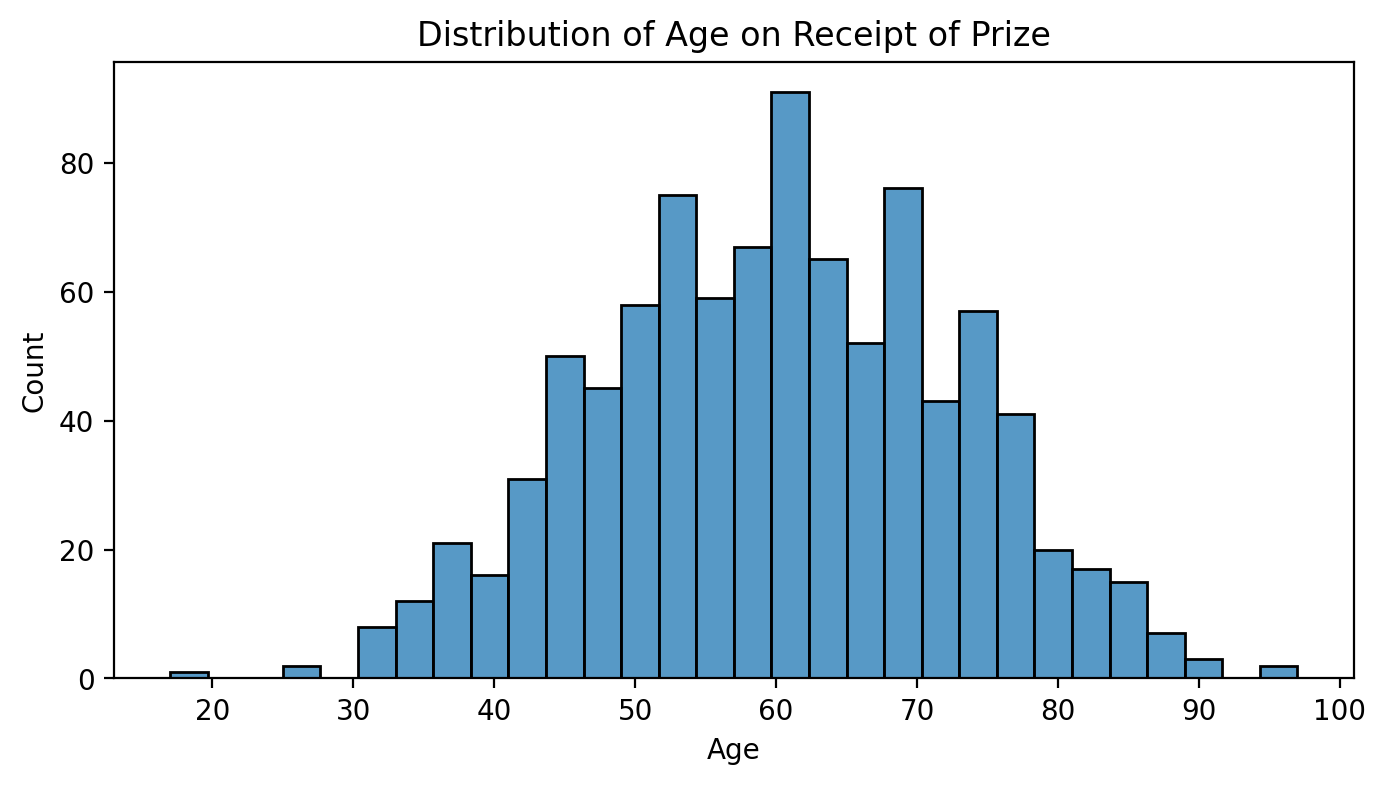

In [73]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

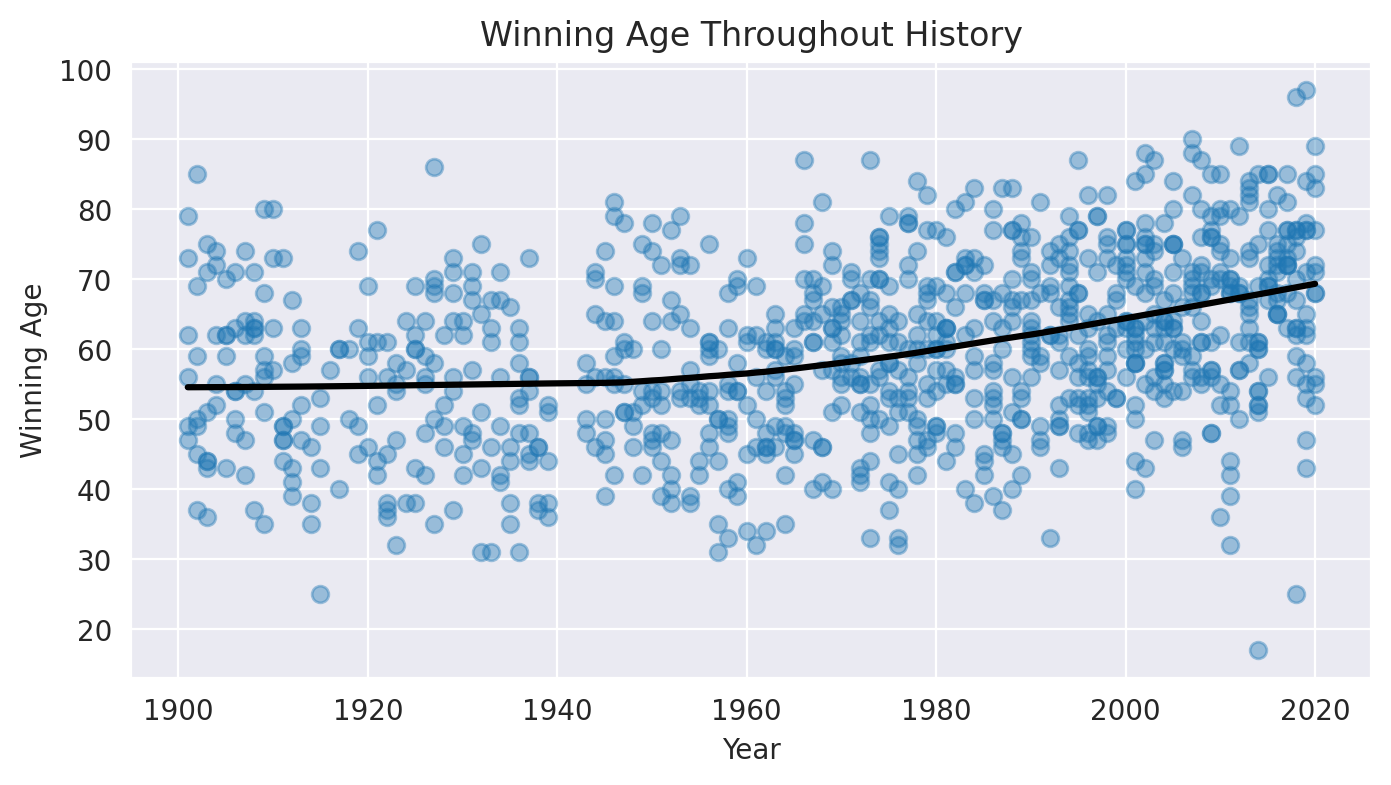

In [76]:
plt.figure(figsize=(8, 4),
           dpi=200)

with sns.axes_style('darkgrid'):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True,
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'black'})

plt.xlabel('Year')
plt.ylabel('Winning Age')
plt.title('Winning Age Throughout History')

plt.show()

### Winning Age Across the Nobel Prize Categories

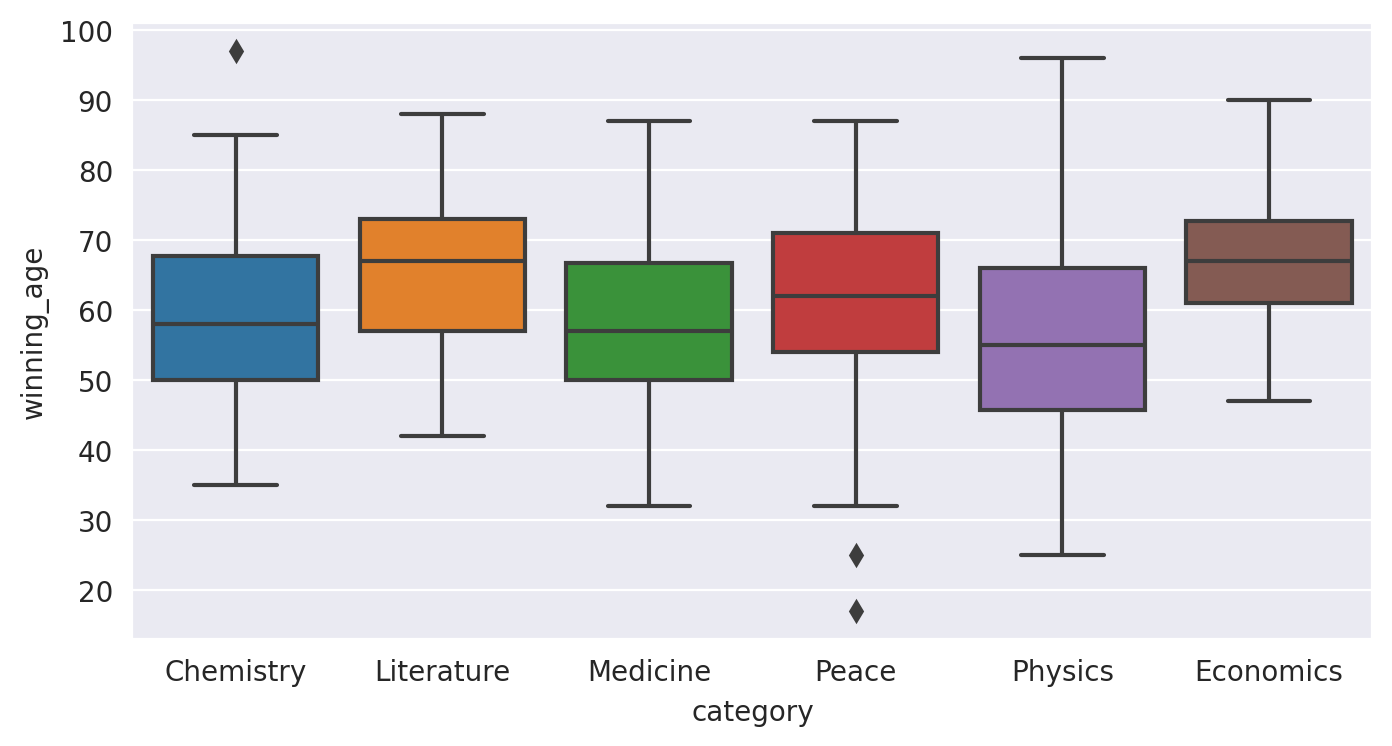

In [77]:
plt.figure(figsize=(8, 4),
           dpi=200)

with sns.axes_style('darkgrid'):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')
    
plt.show()

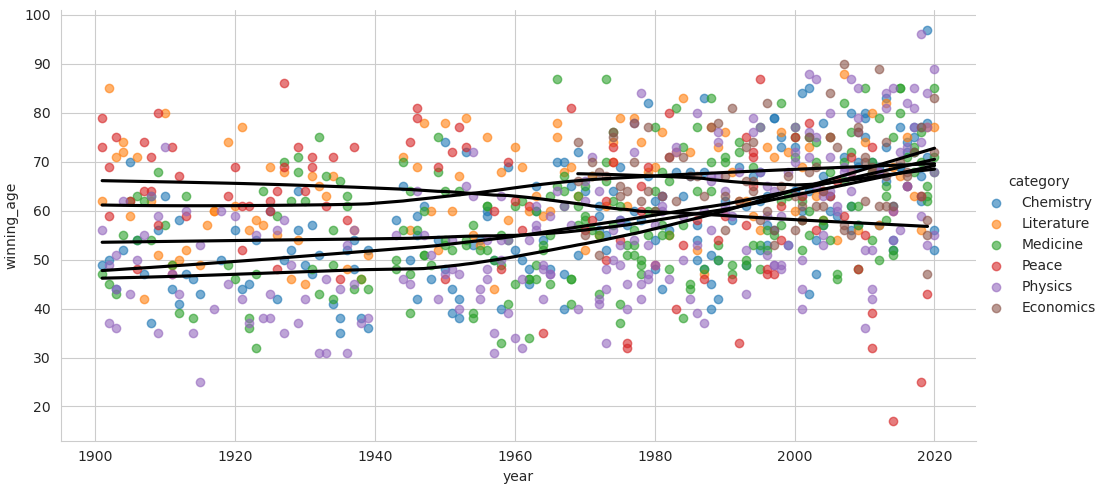

In [80]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               lowess=True,
               hue='category', # Change to row for individual charts
               aspect=2,
               scatter_kws={'alpha': 0.6},
               line_kws={'color': 'black'})
    
plt.show()